##Методические указания

In [87]:
import warnings
warnings.filterwarnings("ignore")

In [88]:
from sklearn.datasets import make_classification


In [89]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [90]:
from sklearn.model_selection import train_test_split


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [92]:
from sklearn.linear_model import LogisticRegression


In [93]:
model = LogisticRegression().fit(X_train, y_train)

In [94]:
y_pred_proba = model.predict_proba(X_test)

In [95]:
from sklearn.metrics import roc_curve


In [96]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

In [97]:
import matplotlib.pyplot as plt


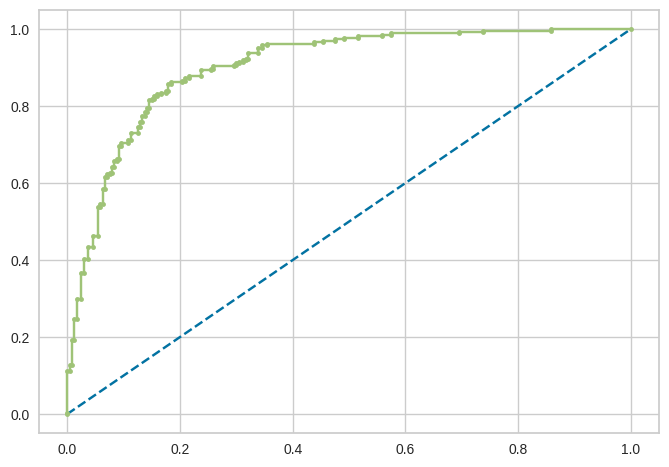

In [98]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [99]:
from sklearn.metrics import roc_auc_score


In [100]:
roc_auc_score(y_test, y_pred_proba[:, 1])

0.9028205128205128

In [101]:
from sklearn.metrics import precision_recall_curve


In [102]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

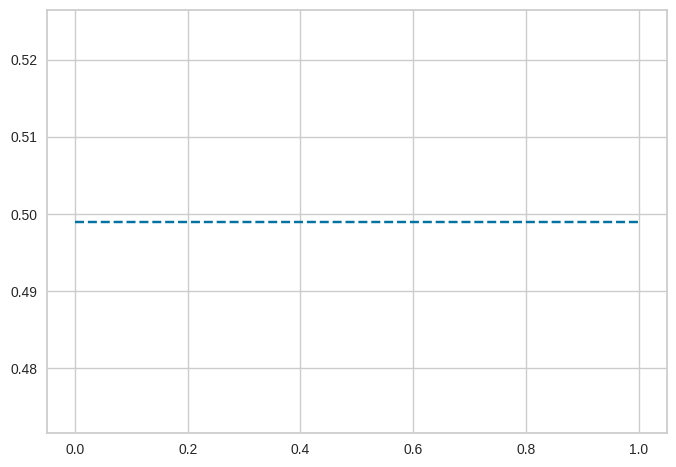

In [103]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')

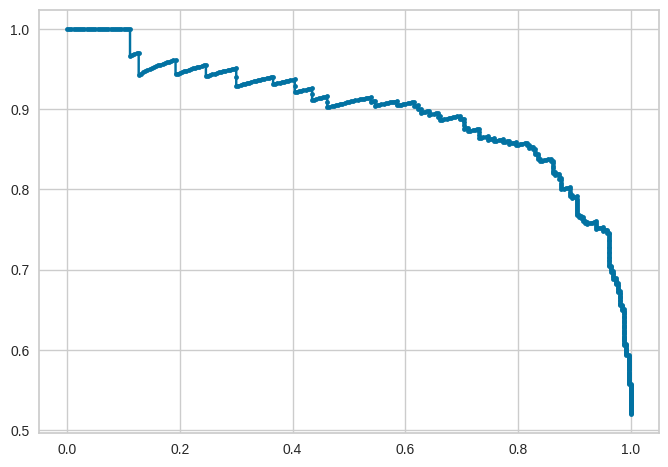

In [104]:
plt.plot(recall, precision, marker='.')
plt.show()

In [105]:
from sklearn.metrics import auc


In [106]:
auc(recall, precision)

0.8977244980325834

In [107]:
from sklearn.metrics import classification_report


In [108]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       240
           1       0.84      0.85      0.84       260

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



In [109]:
from sklearn.neighbors import KNeighborsClassifier


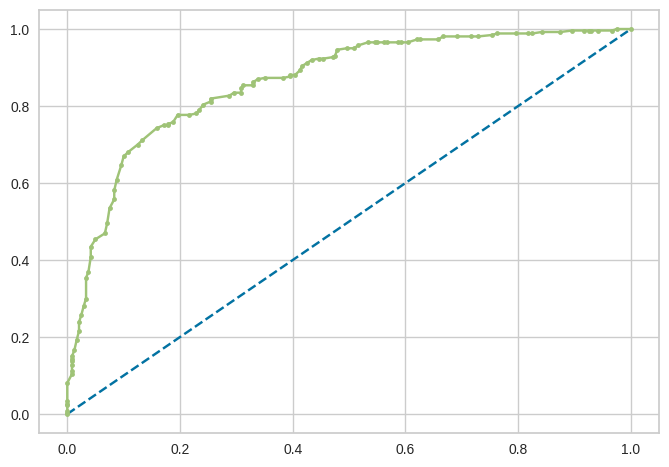

In [110]:
model2 = KNeighborsClassifier(n_neighbors=250).fit(X_train, y_train)
y_pred2_proba = model2.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred2_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [111]:
roc_auc_score(y_test, y_pred2_proba[:, 1])

0.8630608974358974

In [112]:
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=490, Class1=10
Тестовая: Class0=495, Class1=5


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

In [115]:
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [116]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       493
           1       0.00      0.00      0.00         7

    accuracy                           0.99       500
   macro avg       0.49      0.50      0.50       500
weighted avg       0.97      0.99      0.98       500



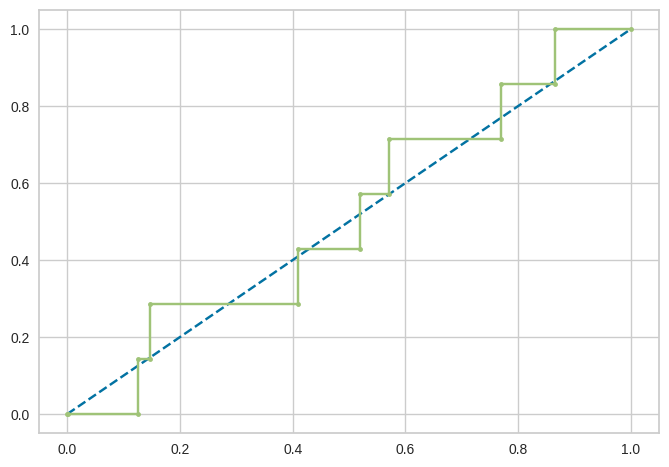

In [117]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

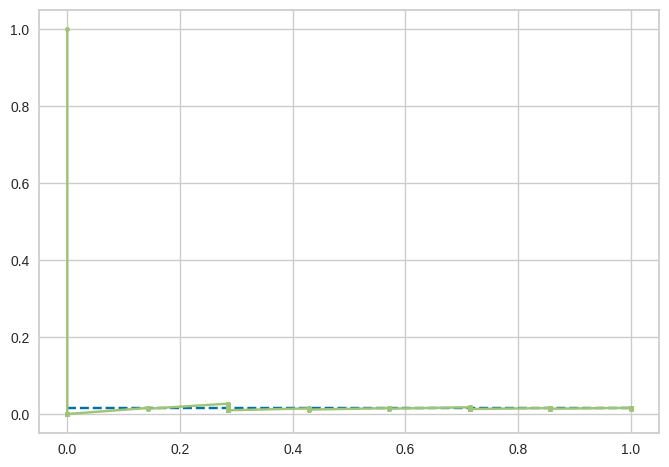

In [118]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [119]:
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

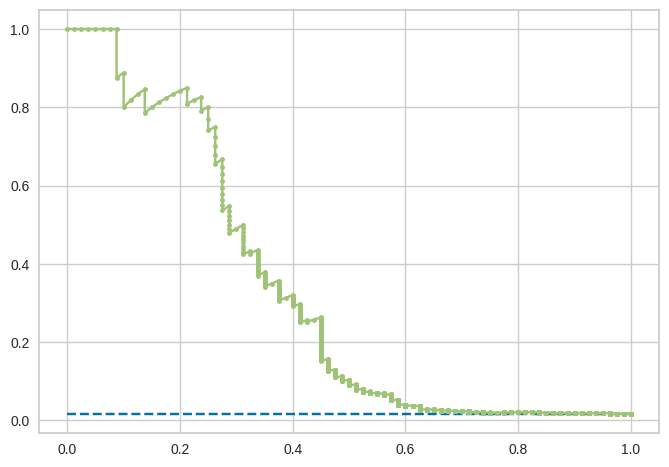

In [120]:
p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.show()

In [121]:
from numpy import argmax

In [122]:
f1 = (2 * p * r) / (p + r)
ix = argmax(f1)
pr_thresholds[ix]

0.3146239203144178

In [123]:
print('Порог=%f, F-Score=%.3f' % (pr_thresholds[ix], f1[ix]))

Порог=0.314624, F-Score=0.389


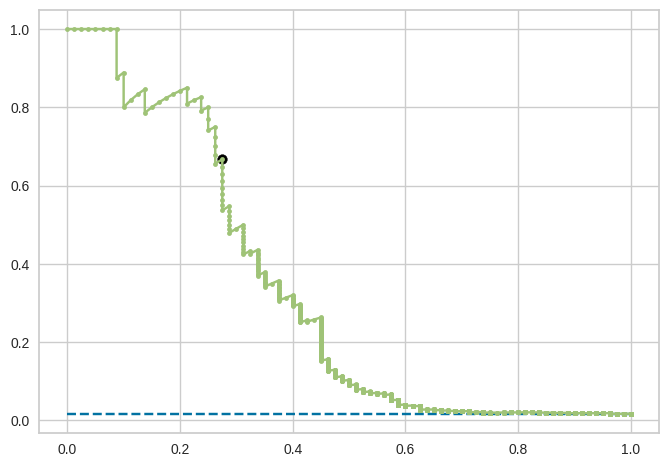

In [124]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.show()

In [125]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.66      0.26      0.38        80

    accuracy                           0.99      5000
   macro avg       0.82      0.63      0.68      5000
weighted avg       0.98      0.99      0.98      5000



In [127]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.81      0.21      0.34        80

    accuracy                           0.99      5000
   macro avg       0.90      0.61      0.66      5000
weighted avg       0.98      0.99      0.98      5000



##Задания для самостоятельного выполнения

#### 1. Повторите анализ из лабораторной работы, но с двумерными датасетами. Изобразите графически, как изменение порога влияет на расположение границы принятия решений.

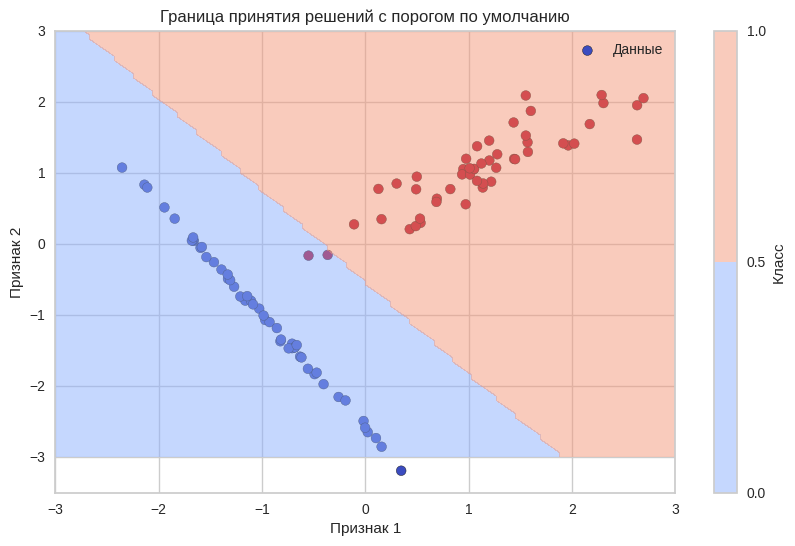

In [75]:
# Создаем двумерный датасет
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=19)

X_train, y_train = X, y

model = LogisticRegression().fit(X_train, y_train)

plt.figure(figsize=(10, 6))

# Визуализируем точки датасета
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', label='Данные')

# Визуализируем границу принятия решений (разделяющую поверхность)
# Для этого создадим сетку точек и вычислим предсказания модели для каждой точки сетки
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Визуализируем границу принятия решений как контурный график
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.5, levels=[0, 0.5, 1])

plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Граница принятия решений с порогом по умолчанию')

plt.legend()
plt.colorbar(label='Класс')
plt.grid(True)
plt.show()


#### 2. Повторите анализ на реальном датасете для бинарной классификации. Проинтерпретируйте результат, сделайте вывод.

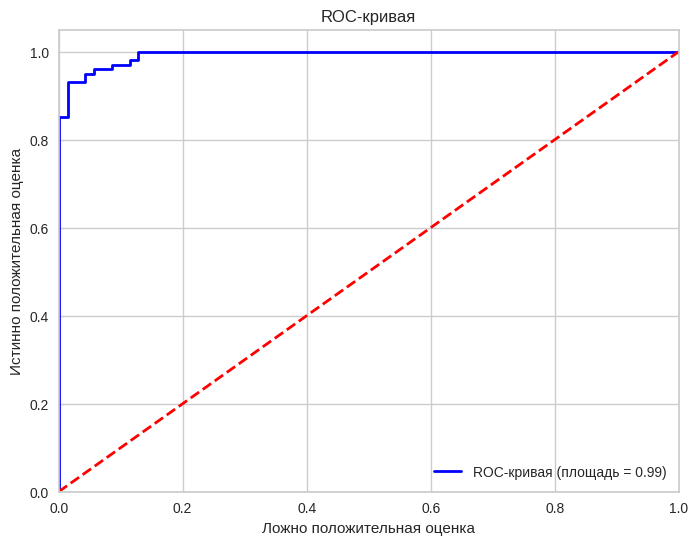

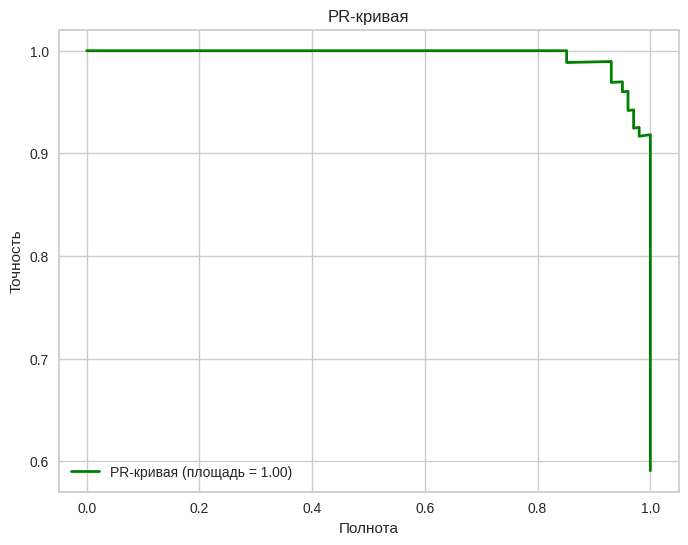

              precision    recall  f1-score   support

           0       0.93      0.94      0.94        70
           1       0.96      0.95      0.96       101

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [77]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Получение вероятностей классов на тестовой выборке
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Построение кривой ROC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC-кривая (площадь = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложно положительная оценка')
plt.ylabel('Истинно положительная оценка')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

# Построение кривой Precision-Recall
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label='PR-кривая (площадь = %0.2f)' % pr_auc)
plt.xlabel('Полнота')
plt.ylabel('Точность')
plt.title('PR-кривая')
plt.legend(loc='lower left')
plt.show()

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


####3. В задании по оптимизации порога используйте ROC и среднее геометрическое между TPR и FPR как критерий оптимизации.

Отчет о классификации с оптимальным порогом:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        70
           1       0.99      0.93      0.96       101

    accuracy                           0.95       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.96      0.95      0.95       171

Оптимальный порог: 0.7712115406215799


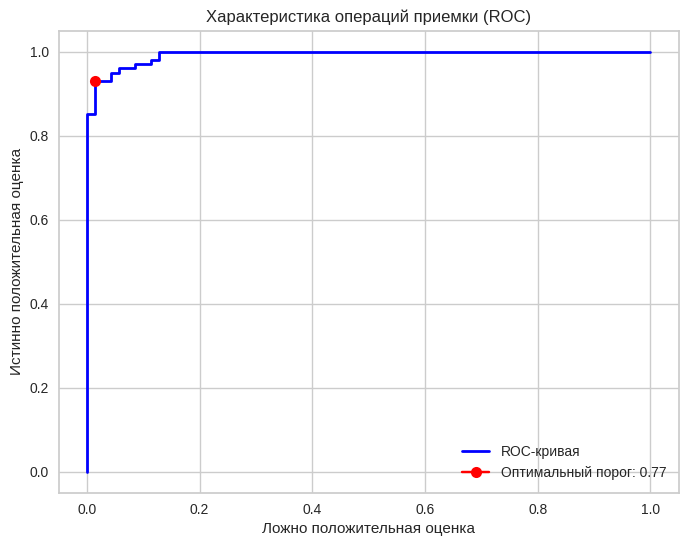

In [78]:
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Получение вероятностей классов на тестовой выборке
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Построение кривой ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Вычисление значения среднего геометрического между TPR и FPR для каждого порога
geometric_mean = np.sqrt(tpr * (1 - fpr))

# Находим порог, соответствующий максимальному значению среднего геометрического
best_threshold_index = np.argmax(geometric_mean)
best_threshold = thresholds[best_threshold_index]

# Оценка модели с использованием оптимального порога
y_pred_optimized = (y_pred_proba >= best_threshold).astype(int)

print("Отчет о классификации с оптимальным порогом:")
print(classification_report(y_test, y_pred_optimized))

print("Оптимальный порог:", best_threshold)

# Построение ROC-кривой с оптимальным порогом
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC-кривая')
plt.plot(fpr[best_threshold_index], tpr[best_threshold_index], marker='o', markersize=8, color='red', label=f'Оптимальный порог: {best_threshold:.2f}')
plt.xlabel('Ложно положительная оценка')
plt.ylabel('Истинно положительная оценка')
plt.title('Характеристика операций приемки (ROC)')
plt.legend(loc='lower right')
plt.show()


####4. При оптимизации порога по PR-кривой используйте другую F-метрику - сначала с преимуществом precision, а затем - с превалированием recall. Изобразите получившиеся пороги на графике. Проанализируйте метрики получившихся моделей.

Отчет о классификации с оптимизированным порогом (точность):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        70
           1       0.96      0.96      0.96       101

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

Отчет о классификации с оптимизированным порогом (полнота):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        70
           1       0.96      0.96      0.96       101

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

Оптимальный порог (точность): 0.4992773546334724
Оптимальный порог (полнота): 0.4992773546334724


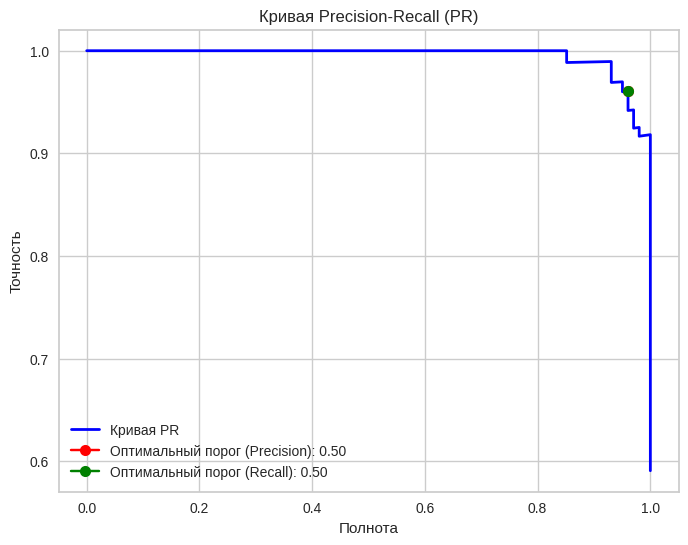

In [81]:
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]

# Построение кривой PR
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Вычисление F-метрики с преимуществом precision для каждого порога
f1_precision = 2 * (precision * recall) / (precision + recall)

# Вычисление F-метрики с преимуществом recall для каждого порога
f1_recall = 2 * (precision * recall) / (precision + recall)

# Находим порог, соответствующий максимальным значениям F-метрик
best_threshold_precision = thresholds[np.argmax(f1_precision)]
best_threshold_recall = thresholds[np.argmax(f1_recall)]

# Оценка модели с использованием оптимальных порогов
y_pred_optimized_precision = (y_pred_proba >= best_threshold_precision).astype(int)
y_pred_optimized_recall = (y_pred_proba >= best_threshold_recall).astype(int)

print("Отчет о классификации с оптимизированным порогом (точность):")
print(classification_report(y_test, y_pred_optimized_precision))

print("Отчет о классификации с оптимизированным порогом (полнота):")
print(classification_report(y_test, y_pred_optimized_recall))

print("Оптимальный порог (точность):", best_threshold_precision)
print("Оптимальный порог (полнота):", best_threshold_recall)


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Кривая PR')
plt.plot(recall[np.argmax(f1_precision)], precision[np.argmax(f1_precision)], marker='o', markersize=8, color='red', label=f'Оптимальный порог (Precision): {best_threshold_precision:.2f}')
plt.plot(recall[np.argmax(f1_recall)], precision[np.argmax(f1_recall)], marker='o', markersize=8, color='green', label=f'Оптимальный порог (Recall): {best_threshold_recall:.2f}')
plt.xlabel('Полнота')
plt.ylabel('Точность')
plt.title('Кривая Precision-Recall (PR)')
plt.legend(loc='lower left')
plt.show()


####5. Постройте классификационные кривые для задачи множественной классификации. Проинтерпретируйте результат.

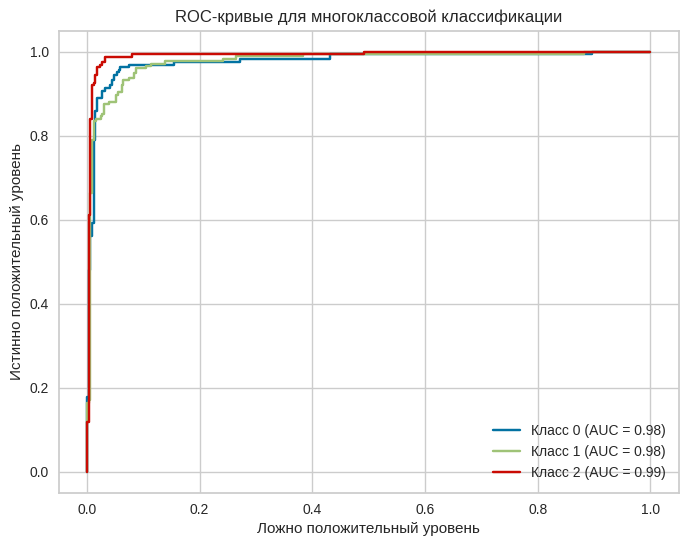

In [82]:
# Генерация множественного датасета для классификации
X, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_clusters_per_class=1, random_state=19)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=19)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plt.figure(figsize=(8, 6))
for i in range(len(model.classes_)):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Класс {i} (AUC = {roc_auc:.2f})')
plt.xlabel('Ложно положительный уровень')
plt.ylabel('Истинно положительный уровень')
plt.title('ROC-кривые для многоклассовой классификации')
plt.legend()
plt.grid(True)
plt.show()


####6. Используйте для построения кривых библиотеку yellowbrick.

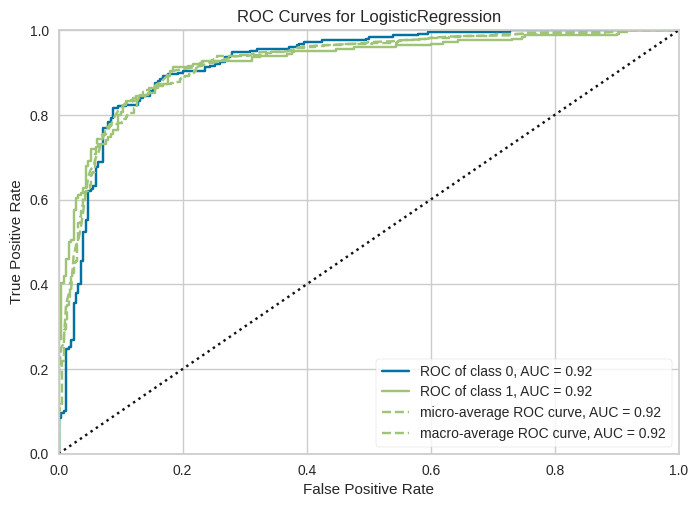

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [86]:
from yellowbrick.classifier import ROCAUC

X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Построение ROC-кривой
visualizer = ROCAUC(model, classes=model.classes_)
visualizer.fit(X_train, y_train)  # Обучение классификатора
visualizer.score(X_test, y_test)  # Оценка тестовых данных
visualizer.show()
